In [198]:
import os
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt


In [200]:
labels = pd.read_csv("labels.csv")

In [202]:
labels.loc[0, 'Name']

'Speed limit (5km/h)'

In [208]:
def load_and_preprocess_image(file_name):
    path = file_name
    img = load_img(path, target_size=(150,150))
    img_array = img_to_array(img) / 255
    #scale the image
    return img_array

def show_img(img_array, title=None):
    plt.imshow((img_array*255).astype('uint8'))  
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

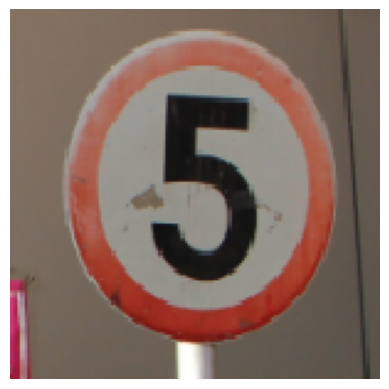

In [210]:
img = load_and_preprocess_image("traffic_Data/DATA/0/000_1_0001.png")
show_img(img)
#test to see if images are saved correctly

In [212]:
data_label = []
data_images = []


In [215]:
for i in range(0, 58):
    
    for root, _, files in os.walk("traffic_Data/DATA/" + str(i)):
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    file_path = os.path.join(root, file)
                    img_array = load_and_preprocess_image(file_path)
                    data_label.append(i)
                    data_images.append(img_array)

In [216]:
data_label = np.array(data_label)
data_images = np.array(data_images)

In [217]:
x_train, x_test, y_train, y_test = train_test_split(data_images, data_label, test_size=0.2, random_state=42)

In [218]:
x_train.shape

(3336, 150, 150, 3)

In [219]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(58, activation='softmax')  

])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [222]:
model.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [227]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 181ms/step - accuracy: 0.3173 - loss: 2.9105
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 181ms/step - accuracy: 0.8139 - loss: 0.6456
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 180ms/step - accuracy: 0.9598 - loss: 0.1619
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - accuracy: 0.9793 - loss: 0.0693
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 183ms/step - accuracy: 0.9843 - loss: 0.0647
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 192ms/step - accuracy: 0.9906 - loss: 0.0420
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 183ms/step - accuracy: 0.9887 - loss: 0.0655
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - accuracy: 0.9985 - loss: 0.0106
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 182ms/step - accuracy: 1.0000 - loss: 3.5335e-04
Epoch 10/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 183ms/step - accuracy: 1.0000 - loss: 1.9131e-04


In [230]:
model.evaluate(x_test, y_test, verbose=2)

27/27 - 1s - 50ms/step - accuracy: 0.9856 - loss: 0.0627


[0.06269373744726181, 0.9856287240982056]

In [232]:
#use the other dataset to show the results and make visualizations for the data now


In [236]:
img = x_test[1]

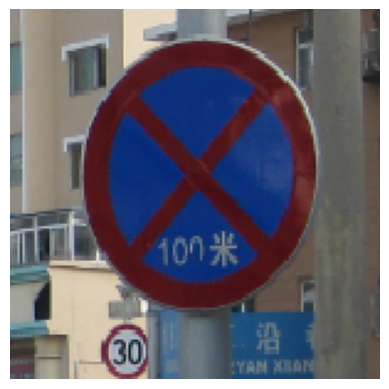

In [240]:
show_img(img)

In [242]:
img = np.expand_dims(img, 0)


In [246]:
predictions_single = model.predict(img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [271]:
labels.loc[np.argmax(predictions_single[0]), "Name"]

'No stopping'

In [283]:
predictions = model.predict(x_test)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


In [366]:
def plot_image(i, predictions_array, y_test, x_test, labels):
  img = x_test[i]
  true_label = y_test[i]

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow((img*255).astype('uint8')) 

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(labels.loc[predicted_label, "Name"],
                                100*np.max(predictions_array),
                                labels.loc[true_label, "Name"]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(58))
  plt.yticks([])
  thisplot = plt.bar(range(58), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
    
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

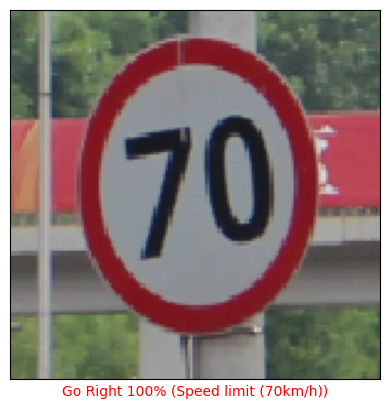

In [368]:
plot_image(10, predictions, y_test, x_test, labels)

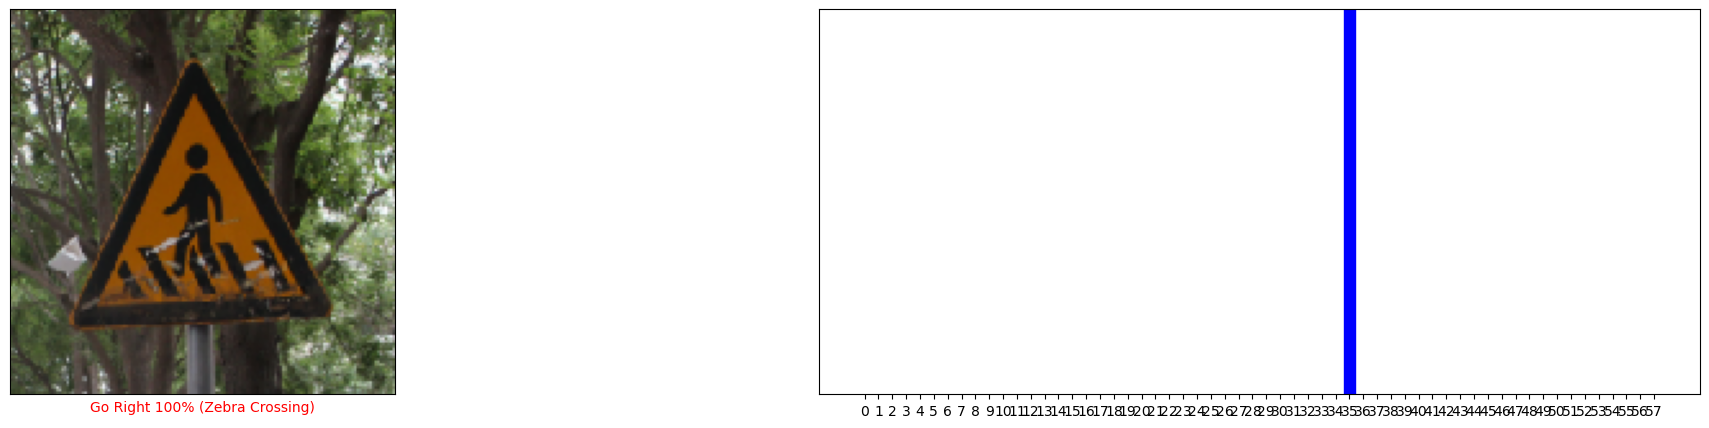

In [378]:
i = 110
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test, labels)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()